<a href="https://colab.research.google.com/github/yash-02/yash-02/blob/main/house_prise_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction by Machine Learning

**** Project Steps*****
-----------------------------
1. Look at the big picture.
2. Get the data we will use Bangalore house price dataset from kaggel
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

The main goal of this project is to find the price of the Bangalorer house using their features.
 

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


loading dataset form kaggle

In [181]:
"""# 2. Load dataset 
Load csv file from google drive
<br>
Main Source: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data
"""
path = "https://drive.google.com/uc?export=download&id=13mP8FeMX09L3utbPcCDp-U2fXnf53gwx"
df_raw = pd.read_csv(path)
df = df_raw
df.shape

(13320, 9)

Data  Analysis part

In [182]:
df_raw.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [183]:
# get the information of data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [184]:
df_raw['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13320, dtype: object

In [185]:
df_raw.isnull().sum()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

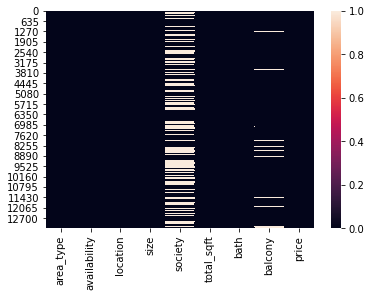

In [186]:
sns.heatmap(df_raw.isnull())

In [187]:
df_raw.drop(columns='society',inplace=True)

In [188]:
df_raw

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [189]:
df_raw.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

**Handeling missing values**

In [190]:
mean = df_raw["balcony"].mean()
mean

1.5843757375501535

In [191]:
df_raw['balcony'] = df_raw['balcony'].fillna(mean) #putting replacing NaN value of bancony by taking mean of balcony 
df_raw

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.000000,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.00


In [192]:
df_raw.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [193]:
# drop na value rows from df_raw
# because there is very less % value missing

In [194]:
df_raw2 = df_raw.dropna(axis=0)
df_raw2

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.000000,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.00


In [195]:
df_raw2.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [196]:
df_raw2["total_sqft"].mode()

0    1200
dtype: object

**Feature Engineering**

In [197]:
#Converting 'total_sqft' cat feature in numeric
total_sqft_new = []
for var in df_raw2["total_sqft"]:
    try:
        var1 = int(var)
        total_sqft_new.append(var1)
        # var1
        # df_raw2.replace(to_replace = var, value =var1)
    except:
        total_sqft_new.append(1200)



In [198]:
df2 = df_raw2.assign(total_sqft_new = total_sqft_new)
df2 = df2.drop(columns ="total_sqft" )
df2

,area_type,availability,location,size,bath,balcony,price,total_sqft_new
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,2.0,1.000000,39.07,1056
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,5.0,3.000000,120.00,2600
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,2.0,3.000000,62.00,1440
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,3.0,1.000000,95.00,1521
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,2.0,1.000000,51.00,1200
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,4.0,0.000000,231.00,3453
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,5.0,1.584376,400.00,3600
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,2.0,1.000000,60.00,1141
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4.0,1.000000,488.00,4689


In [199]:
df2.info(),df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13246 non-null  object 
 1   availability    13246 non-null  object 
 2   location        13246 non-null  object 
 3   size            13246 non-null  object 
 4   bath            13246 non-null  float64
 5   balcony         13246 non-null  float64
 6   price           13246 non-null  float64
 7   total_sqft_new  13246 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 931.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13246 non-null  object 
 1   availability  13246 non-null  object 
 2   location      13246 non-null  object 
 3   size          13246 non-null  object 
 4   total_s

(None, None)

In [200]:
df2

,area_type,availability,location,size,bath,balcony,price,total_sqft_new
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,2.0,1.000000,39.07,1056
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,5.0,3.000000,120.00,2600
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,2.0,3.000000,62.00,1440
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,3.0,1.000000,95.00,1521
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,2.0,1.000000,51.00,1200
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,4.0,0.000000,231.00,3453
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,5.0,1.584376,400.00,3600
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,2.0,1.000000,60.00,1141
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4.0,1.000000,488.00,4689


In [201]:
#Converting 'Size' cat feature in numeric

In [202]:
size2 =[]
for v in df2['size']:
    tem = v.split(" ")
    size2.append(int(tem[0]))
df2['size'] = size2

In [203]:
df2

,area_type,availability,location,size,bath,balcony,price,total_sqft_new
0,Super built-up Area,19-Dec,Electronic City Phase II,2,2.0,1.000000,39.07,1056
1,Plot Area,Ready To Move,Chikka Tirupathi,4,5.0,3.000000,120.00,2600
2,Built-up Area,Ready To Move,Uttarahalli,3,2.0,3.000000,62.00,1440
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,3.0,1.000000,95.00,1521
4,Super built-up Area,Ready To Move,Kothanur,2,2.0,1.000000,51.00,1200
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,4.0,0.000000,231.00,3453
13316,Super built-up Area,Ready To Move,Richards Town,4,5.0,1.584376,400.00,3600
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,2.0,1.000000,60.00,1141
13318,Super built-up Area,18-Jun,Padmanabhanagar,4,4.0,1.000000,488.00,4689


In [204]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13246 non-null  object 
 1   availability    13246 non-null  object 
 2   location        13246 non-null  object 
 3   size            13246 non-null  int64  
 4   bath            13246 non-null  float64
 5   balcony         13246 non-null  float64
 6   price           13246 non-null  float64
 7   total_sqft_new  13246 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 931.4+ KB


**Working on <<<< Size >>>> feature**

In [205]:
bath =[]
for v2 in df2['bath']:
    var= int(v2)
    bath.append(var)
df2['bath'] = bath

In [206]:
df2

,area_type,availability,location,size,bath,balcony,price,total_sqft_new
0,Super built-up Area,19-Dec,Electronic City Phase II,2,2,1.000000,39.07,1056
1,Plot Area,Ready To Move,Chikka Tirupathi,4,5,3.000000,120.00,2600
2,Built-up Area,Ready To Move,Uttarahalli,3,2,3.000000,62.00,1440
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,3,1.000000,95.00,1521
4,Super built-up Area,Ready To Move,Kothanur,2,2,1.000000,51.00,1200
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,4,0.000000,231.00,3453
13316,Super built-up Area,Ready To Move,Richards Town,4,5,1.584376,400.00,3600
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,2,1.000000,60.00,1141
13318,Super built-up Area,18-Jun,Padmanabhanagar,4,4,1.000000,488.00,4689


In [207]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13246 non-null  object 
 1   availability    13246 non-null  object 
 2   location        13246 non-null  object 
 3   size            13246 non-null  int64  
 4   bath            13246 non-null  int64  
 5   balcony         13246 non-null  float64
 6   price           13246 non-null  float64
 7   total_sqft_new  13246 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 931.4+ KB


In [208]:
"""## Finding Outlier and Removing"""
 
# function to create histogram, Q-Q plot and boxplot
 
# for Q-Q plots
import scipy.stats as stats
 
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments
 
    # define figure size
    plt.figure(figsize=(16, 4))
 
    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
 
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
 
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
 
    plt.show()

******* bath *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


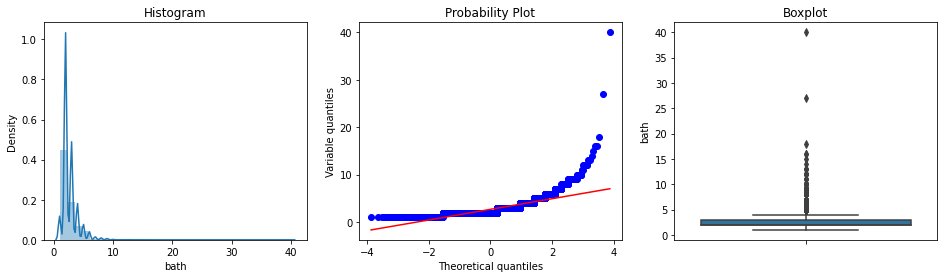

******* balcony *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


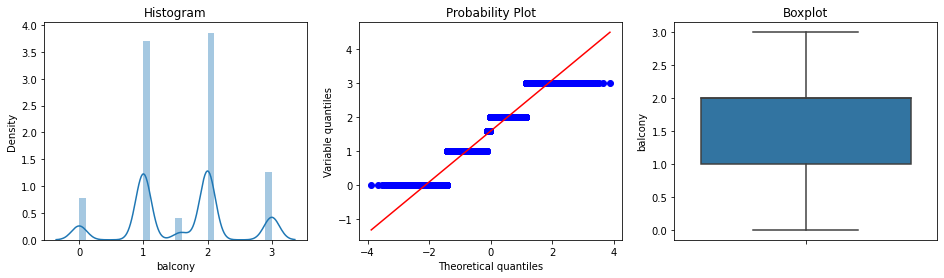

******* total_sqft_new *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


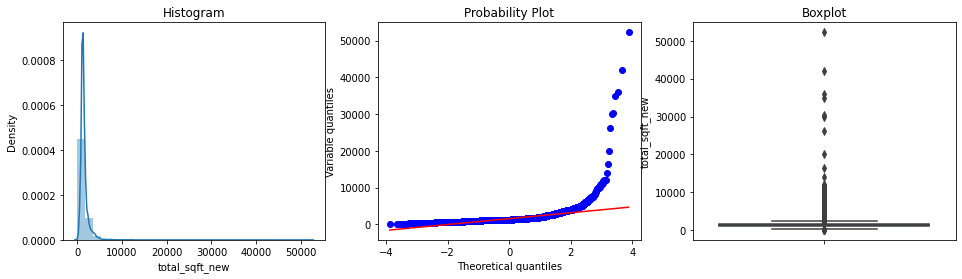

******* size *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


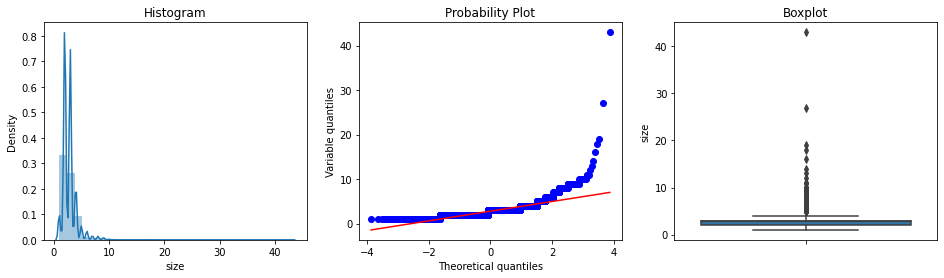

******* price *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


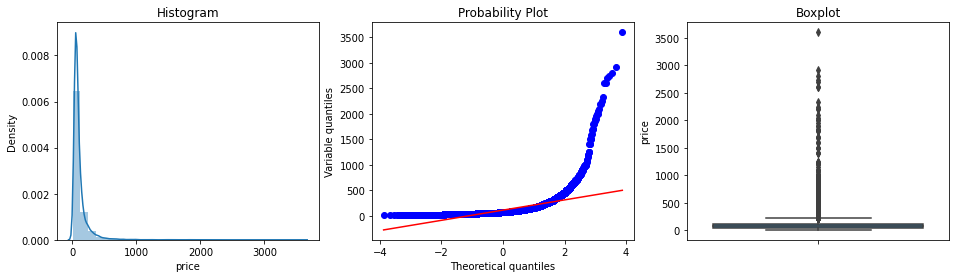

In [209]:
num_var = ["bath","balcony","total_sqft_new","size","price"]
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df2, var)

here we observe outlier using histogram,, qq plot and boxplot

here we consider  1 BHK requierd min 350 sqft are 

In [210]:
#if total area of 1 bhk needed is < than 350 then removed it

df3 = df2[(df2["total_sqft_new"]/df2["size"] >= 350)]
df3.shape


(12092, 8)

In [211]:
df3.head()

,area_type,availability,location,size,bath,balcony,price,total_sqft_new
0,Super built-up Area,19-Dec,Electronic City Phase II,2,2,1.0,39.07,1056
1,Plot Area,Ready To Move,Chikka Tirupathi,4,5,3.0,120.00,2600
2,Built-up Area,Ready To Move,Uttarahalli,3,2,3.0,62.00,1440
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,3,1.0,95.00,1521
4,Super built-up Area,Ready To Move,Kothanur,2,2,1.0,51.00,1200


In [212]:
# create new feature that is price per squre foot 
# it help to find the outliers

In [213]:
df3["price_square_feet"] =  df3["price"]*100000/df3["total_sqft_new"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [214]:
df3.head()

,area_type,availability,location,size,bath,balcony,price,total_sqft_new,price_square_feet
0,Super built-up Area,19-Dec,Electronic City Phase II,2,2,1.0,39.07,1056,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4,5,3.0,120.00,2600,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3,2,3.0,62.00,1440,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,3,1.0,95.00,1521,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,2,1.0,51.00,1200,4250.000000


In [215]:
# print(df3.describe())
df3.describe()

,size,bath,balcony,price,total_sqft_new,price_square_feet
count,12092.000000,12092.000000,12092.000000,12092.000000,12092.000000,12092.000000
mean,2.611561,2.528200,1.596464,110.070318,1594.253887,6199.663524
std,0.940655,1.041341,0.789082,152.968234,1268.453793,4091.341163
min,1.000000,1.000000,0.000000,9.000000,350.000000,267.829813
25%,2.000000,2.000000,1.000000,49.000000,1125.000000,4190.260476
50%,2.000000,2.000000,2.000000,69.000000,1300.000000,5263.157895
75%,3.000000,3.000000,2.000000,112.000000,1700.000000,6818.181818
max,16.000000,16.000000,3.000000,3600.000000,52272.000000,176470.588235


In [216]:
df3.shape

(12092, 9)

In [217]:
df4  =df3[(df3["price_square_feet"]<10000)]
df4

,area_type,availability,location,size,bath,balcony,price,total_sqft_new,price_square_feet
0,Super built-up Area,19-Dec,Electronic City Phase II,2,2,1.0,39.07,1056,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4,5,3.0,120.00,2600,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3,2,3.0,62.00,1440,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,3,1.0,95.00,1521,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,2,1.0,51.00,1200,4250.000000
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3,2,1.0,57.00,1345,4237.918216
13314,Super built-up Area,Ready To Move,Green Glen Layout,3,3,3.0,112.00,1715,6530.612245
13315,Built-up Area,Ready To Move,Whitefield,5,4,0.0,231.00,3453,6689.834926
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,2,1.0,60.00,1141,5258.545136


In [218]:
# Removing outliers using help of 'price per sqrt'  taking std and mean per location
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.price_square_feet)
    st=np.std(subdf.price_square_feet)
    reduced_df = subdf[(subdf.price_square_feet>(m-st))&(subdf.price_square_feet<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out
 
df9 = remove_pps_outliers(df3)
df9.shape

(8906, 9)

In [219]:
df9.describe()

,size,bath,balcony,price,total_sqft_new,price_square_feet
count,8906.000000,8906.000000,8906.000000,8906.000000,8906.000000,8906.000000
mean,2.539861,2.447002,1.609563,93.956319,1502.466876,5713.036454
std,0.815374,0.907977,0.769501,111.716179,890.765685,2553.032038
min,1.000000,1.000000,0.000000,10.000000,350.000000,1250.000000
25%,2.000000,2.000000,1.000000,49.342500,1115.000000,4255.319149
50%,2.000000,2.000000,2.000000,67.000000,1280.000000,5181.818182
75%,3.000000,3.000000,2.000000,100.000000,1640.000000,6398.264755
max,10.000000,12.000000,3.000000,2912.000000,30400.000000,54166.666667


******* bath *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


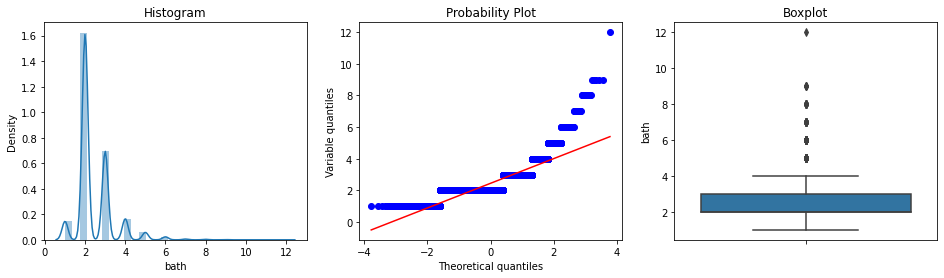

******* balcony *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


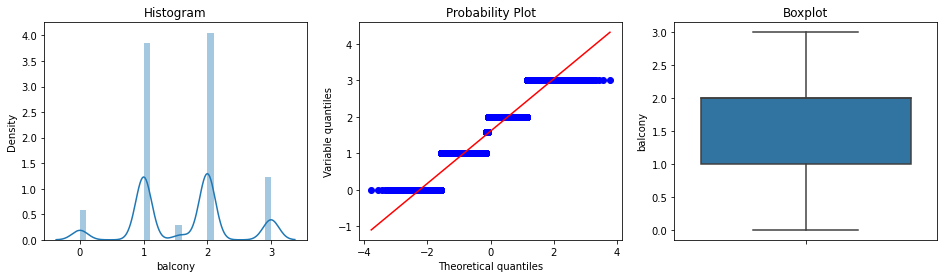

******* total_sqft_new *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


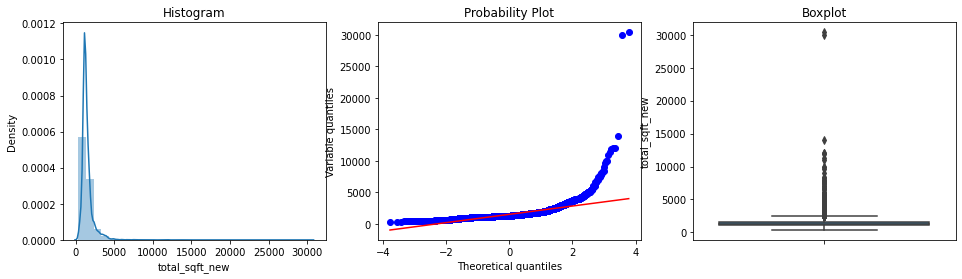

******* size *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


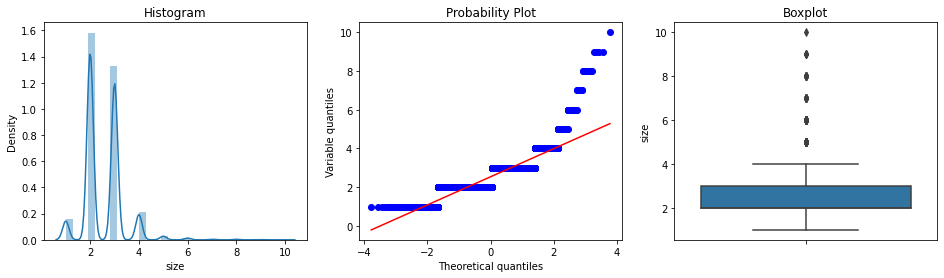

******* price *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


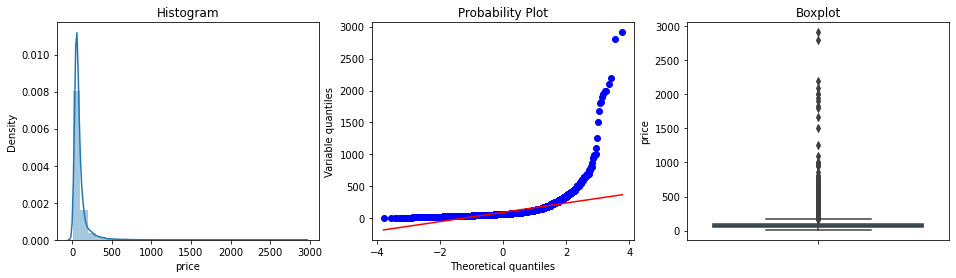

In [220]:
num_var = ["bath","balcony","total_sqft_new","size","price"]
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df9, var)

In [221]:
df4.head()

,area_type,availability,location,size,bath,balcony,price,total_sqft_new,price_square_feet
0,Super built-up Area,19-Dec,Electronic City Phase II,2,2,1.0,39.07,1056,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4,5,3.0,120.00,2600,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3,2,3.0,62.00,1440,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,3,1.0,95.00,1521,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,2,1.0,51.00,1200,4250.000000


In [222]:
def plot_scatter_chart(df=df9,location='Whitefield'):
  bhk2 = df[(df.location==location) & (df['size']==2)]
  bhk3 = df[(df.location==location) & (df['size']==3)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk2["total_sqft_new"], bhk2["price"], color='Blue', label='2 BHK', s=50)
  plt.scatter(bhk3["total_sqft_new"], bhk3["price"], color='Red', label='3 BHK', s=50, marker="+")
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title("location")
  plt.legend()
  plt.show()
 


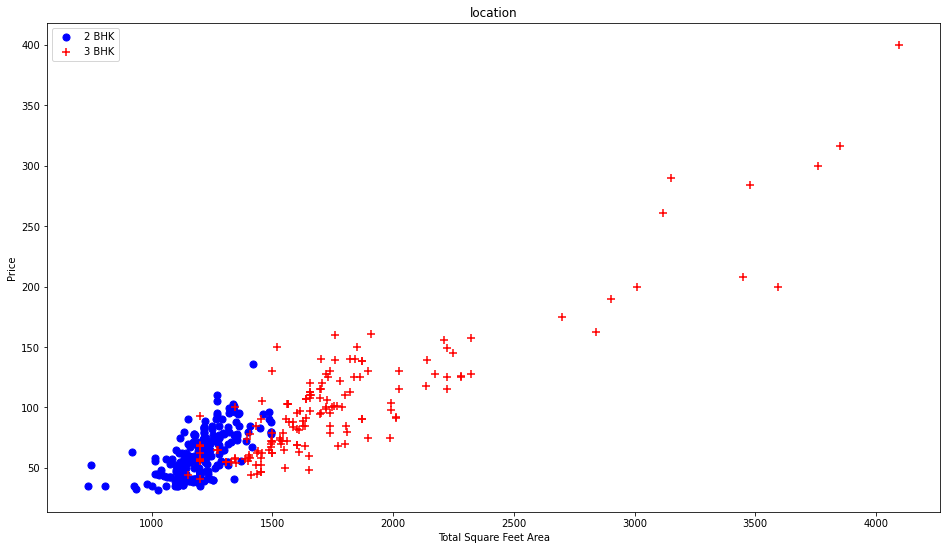

In [223]:

plot_scatter_chart(df4)
 

# in below scatterplot we observe that at same location price of
# 2 bhk house is greater than 3 bhk so it is outlier

In [224]:
# df9.head()
df9['location'].value_counts()
df9.columns

Index(['area_type', 'availability', 'location', 'size', 'bath', 'balcony',
       'price', 'total_sqft_new', 'price_square_feet'],
      dtype='object')

In [225]:
df4["location"]
df4.columns

Index(['area_type', 'availability', 'location', 'size', 'bath', 'balcony',
       'price', 'total_sqft_new', 'price_square_feet'],
      dtype='object')

In [226]:
# Removing BHK outliers
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('size'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_square_feet),
          'std':np.std(bhk_df.price_square_feet),
          'count':bhk_df.shape[0]}
    for bhk, bhk_df in location_df.groupby('size'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_square_feet<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')
 



In [227]:
df5 = remove_bhk_outliers(df4)
df5.shape

(8997, 9)

<Figure size 1152x648 with 0 Axes>

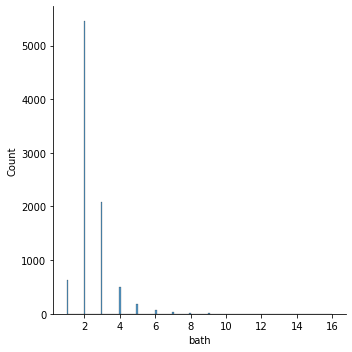

In [228]:
plt.figure(figsize=(16,9))
sns.displot(df5["bath"])

In [229]:
# df5 = df4[df4["bath"] < 5]
# df4.shape,df5.shape

In [230]:
# df5["price"].describe()

In [231]:
df6 = df5[~(df5["price"] > 400)]
df6

,area_type,availability,location,size,bath,balcony,price,total_sqft_new,price_square_feet
0,Super built-up Area,19-Dec,Electronic City Phase II,2,2,1.000000,39.07,1056,3699.810606
2,Built-up Area,Ready To Move,Uttarahalli,3,2,3.000000,62.00,1440,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,3,1.000000,95.00,1521,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,2,1.000000,51.00,1200,4250.000000
6,Super built-up Area,18-May,Old Airport Road,4,4,1.584376,204.00,2732,7467.057101
...,...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2,2,2.000000,47.00,1262,3724.247227
13313,Super built-up Area,Ready To Move,Uttarahalli,3,2,1.000000,57.00,1345,4237.918216
13314,Super built-up Area,Ready To Move,Green Glen Layout,3,3,3.000000,112.00,1715,6530.612245
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,2,1.000000,60.00,1141,5258.545136


In [232]:
# sns.displot(df5["total_sqft_new"])

df5["total_sqft_new"].describe()

count     8997.000000
mean      1494.065355
std       1226.709069
min        350.000000
25%       1100.000000
50%       1246.000000
75%       1610.000000
max      52272.000000
Name: total_sqft_new, dtype: float64

In [233]:
df7 = df6[df6["total_sqft_new"] < 10000 ]
df7
# df5["total_sqft_new"].values

,area_type,availability,location,size,bath,balcony,price,total_sqft_new,price_square_feet
0,Super built-up Area,19-Dec,Electronic City Phase II,2,2,1.000000,39.07,1056,3699.810606
2,Built-up Area,Ready To Move,Uttarahalli,3,2,3.000000,62.00,1440,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,3,1.000000,95.00,1521,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,2,1.000000,51.00,1200,4250.000000
6,Super built-up Area,18-May,Old Airport Road,4,4,1.584376,204.00,2732,7467.057101
...,...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2,2,2.000000,47.00,1262,3724.247227
13313,Super built-up Area,Ready To Move,Uttarahalli,3,2,1.000000,57.00,1345,4237.918216
13314,Super built-up Area,Ready To Move,Green Glen Layout,3,3,3.000000,112.00,1715,6530.612245
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,2,1.000000,60.00,1141,5258.545136


******* bath *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


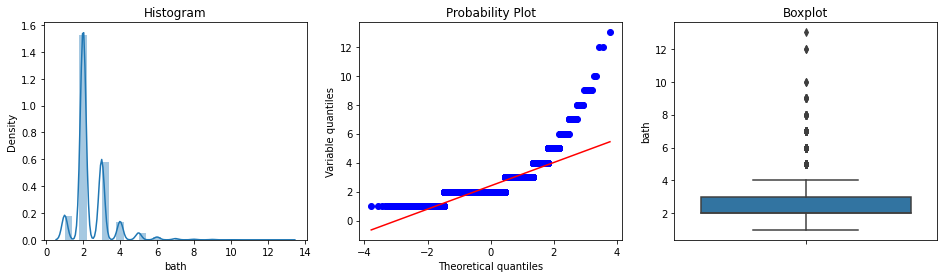

******* balcony *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


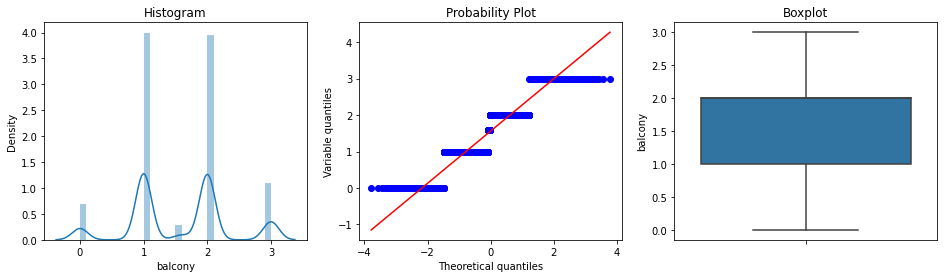

******* total_sqft_new *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


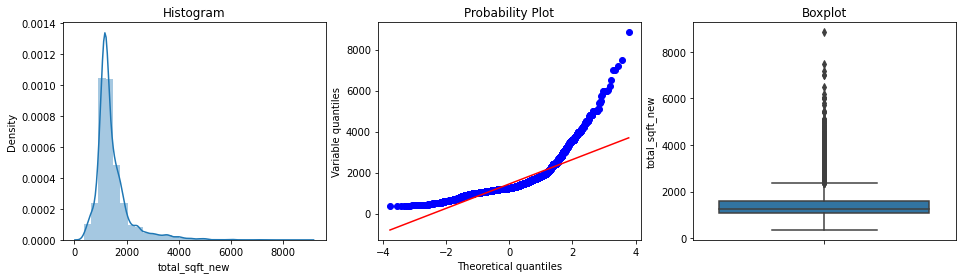

******* size *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


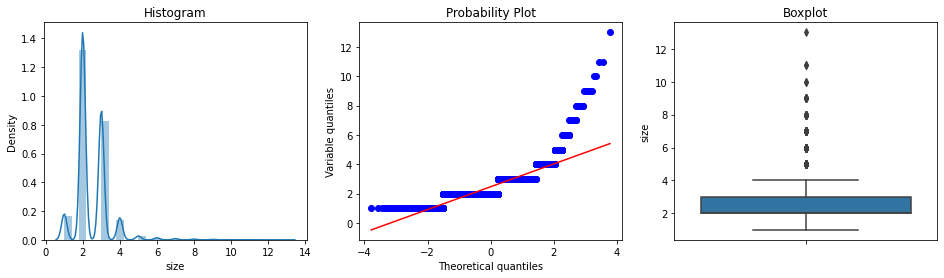

******* price *******


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


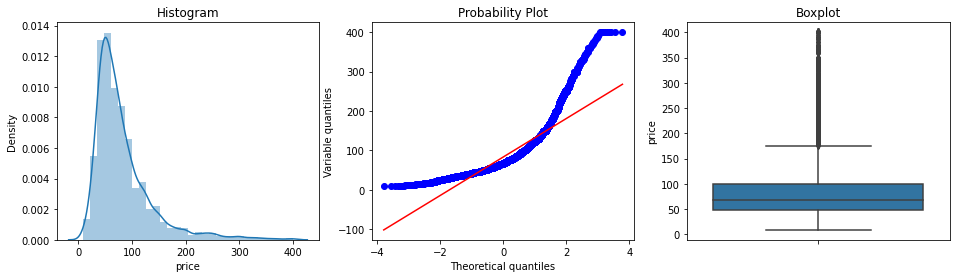

In [234]:
num_var = ["bath","balcony","total_sqft_new","size","price"]
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df7, var)

In [235]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area_type          8953 non-null   object 
 1   availability       8953 non-null   object 
 2   location           8953 non-null   object 
 3   size               8953 non-null   int64  
 4   bath               8953 non-null   int64  
 5   balcony            8953 non-null   float64
 6   price              8953 non-null   float64
 7   total_sqft_new     8953 non-null   int64  
 8   price_square_feet  8953 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 699.5+ KB


**Make a variable df8 that contains only Numerical vales**

In [236]:
df8 = df7.drop(columns = ["area_type","availability","location","price_square_feet"])
df8

,size,bath,balcony,price,total_sqft_new
0,2,2,1.000000,39.07,1056
2,3,2,3.000000,62.00,1440
3,3,3,1.000000,95.00,1521
4,2,2,1.000000,51.00,1200
6,4,4,1.584376,204.00,2732
...,...,...,...,...,...
13312,2,2,2.000000,47.00,1262
13313,3,2,1.000000,57.00,1345
13314,3,3,3.000000,112.00,1715
13317,2,2,1.000000,60.00,1141


**Make a variable df13 that contains only Categrical values**

In [237]:
df13 = df7.drop(["size","total_sqft_new","bath","balcony","price","price_square_feet"], axis =1)
df13.head()

,area_type,availability,location
0,Super built-up Area,19-Dec,Electronic City Phase II
2,Built-up Area,Ready To Move,Uttarahalli
3,Super built-up Area,Ready To Move,Lingadheeranahalli
4,Super built-up Area,Ready To Move,Kothanur
6,Super built-up Area,18-May,Old Airport Road


**Categorical Variable Encoding**

In [238]:
 
df14 = pd.get_dummies(df13, drop_first=True, columns=['area_type','availability','location'])
df14.shape
 

(8953, 1134)

In [239]:
df14.head()

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_15-Aug,availability_15-Jun,availability_15-Nov,availability_15-Oct,availability_16-Dec,availability_16-Jul,availability_16-Mar,availability_16-Nov,availability_16-Oct,availability_16-Sep,availability_17-Apr,availability_17-Aug,availability_17-Dec,availability_17-Jan,availability_17-Jul,availability_17-Jun,availability_17-Mar,availability_17-May,availability_17-Nov,availability_17-Oct,availability_17-Sep,availability_18-Apr,availability_18-Aug,availability_18-Dec,availability_18-Feb,availability_18-Jan,availability_18-Jul,availability_18-Jun,availability_18-Mar,availability_18-May,availability_18-Nov,availability_18-Oct,availability_18-Sep,availability_19-Apr,availability_19-Aug,availability_19-Dec,availability_19-Feb,...,location_Vyalikaval,location_Wajid layout thanisandra,location_Weavers Colony,location_Wheelers Road,"location_Whietfield,",location_Whitefield,location_Whitefield ECC Road,"location_Whitefield,",location_Williams Town,location_Wilson Garden,location_Yarandahalli,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yemlur,"location_Yemlur, Old Airport Road,",location_Yeshwanthpur,location_Yeshwanthpur Industrial Suburb,location_Zuzuvadi,location_adigondanhalli,location_arudi,location_banashankari stage iii sa,location_basaveshwarnagar,location_elachenahalli,location_kadubisnahalli,location_kanakapura main road,location_kanakapura road,location_manyata,location_manyata park,location_manyata tech park,location_mvj engineering college,location_near Ramanashree California resort,location_pavitra paradise,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_tc.palya,location_whitefiled
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [240]:
df14.to_csv('oh_encoded_data.csv', index=False) # test ml model on this data

 
"""In ['area_type','availability','location'] contain multiple classe and if we convert them into OHE so it increase the size of DF 
so try to use those classes which are *frequently* present in the car var

In [241]:
## Working on <<<<<< area_type >>>>> feature

 
df13['area_type'].value_counts()
 
df15 = df13.copy()
# appy Ohe-Hot  encoding on 'area_type' feature
for cat_var in ["Super built-up  Area","Built-up  Area","Plot  Area"]:
  df15["area_type"+cat_var] = np.where(df15['area_type']==cat_var, 1,0)
df15.shape
 
df15.head(2)

,area_type,availability,location,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area
0,Super built-up Area,19-Dec,Electronic City Phase II,1,0,0
2,Built-up Area,Ready To Move,Uttarahalli,0,1,0


In [242]:
"""## Working with <<<<< availability >>>>> Feature"""
 
df15["availability"].value_counts()
 
# in availability feature, 10525 house 'Ready to Move" and remaining will be redy on perticuler date
# so we crate new feature ""availability_Ready To Move"" and add vale 1 if availability is Ready To Move else 0
df15["availability_Ready To Move"] = np.where(df15["availability"]=="Ready To Move",1,0)
df15.shape
 
df15.tail()

,area_type,availability,location,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
13312,Super built-up Area,Ready To Move,Bellandur,1,0,0,1
13313,Super built-up Area,Ready To Move,Uttarahalli,1,0,0,1
13314,Super built-up Area,Ready To Move,Green Glen Layout,1,0,0,1
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,0,1,0,1
13319,Super built-up Area,Ready To Move,Doddathoguru,1,0,0,1


In [243]:
"""## Working on <<<< Location >>>> feature"""
 
location_value_count = df15['location'].value_counts()
location_value_count

Whitefield               273
Sarjapur  Road           234
Thanisandra              153
Hebbal                   141
Raja Rajeshwari Nagar    139
                        ... 
Iggalur                    1
Ashraya Layout             1
Bandepalya                 1
kadubisnahalli             1
Kadarenahalli              1
Name: location, Length: 1058, dtype: int64

In [244]:
location_gert_20 = location_value_count[location_value_count>=20].index
location_gert_20

Index(['Whitefield', 'Sarjapur  Road', 'Thanisandra', 'Hebbal',
       'Raja Rajeshwari Nagar', 'Electronic City', 'Hennur Road',
       'Haralur Road', 'Uttarahalli', 'Yelahanka',
       ...
       'Kodichikkanahalli', 'Horamavu Banaswadi', 'Lingadheeranahalli',
       'Kathriguppe', 'Nagarbhavi', 'Kammasandra', 'Ardendale', 'Singasandra',
       'Anandapura', 'Kambipura'],
      dtype='object', length=102)

In [245]:
# location count is greter than 19 then we create column of that feature 
# then if this location present in location feature then set value 1 else 0 ( ohe hot encoding)
df16 = df15.copy()
for cat_var in location_gert_20:
  df16['location_'+cat_var]=np.where(df16['location']==cat_var, 1,0)
df16.shape

(8953, 109)

In [246]:
df16.head()

,area_type,availability,location,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Thanisandra,location_Hebbal,location_Raja Rajeshwari Nagar,location_Electronic City,location_Hennur Road,location_Haralur Road,location_Uttarahalli,location_Yelahanka,location_Marathahalli,location_Kanakpura Road,location_7th Phase JP Nagar,location_Bannerghatta Road,location_Electronic City Phase II,location_Bellandur,location_KR Puram,location_Chandapura,location_Hosa Road,location_Harlur,location_Hormavu,location_Varthur,location_Sarjapur,location_Begur Road,location_Kasavanhalli,location_Hoodi,location_Banashankari,location_Kaggadasapura,location_Kothanur,location_Akshaya Nagar,location_Old Madras Road,location_Yeshwanthpur,location_Jakkur,...,location_Kadugodi,location_Hegde Nagar,location_Balagere,location_Bhoganhalli,location_Jigani,location_Old Airport Road,location_Brookefield,location_5th Phase JP Nagar,location_Subramanyapura,location_Kengeri Satellite Town,location_Tumkur Road,location_Vijayanagar,location_Sahakara Nagar,location_Attibele,location_Kudlu Gate,location_Yelahanka New Town,location_9th Phase JP Nagar,location_Ananth Nagar,location_TC Palaya,location_Ambedkar Nagar,location_Doddathoguru,location_Kudlu,location_Devanahalli,location_Dodda Nekkundi,location_Mahadevpura,location_Koramangala,location_Bommanahalli,location_Anekal,location_Vidyaranyapura,location_Ambalipura,location_Kodichikkanahalli,location_Horamavu Banaswadi,location_Lingadheeranahalli,location_Kathriguppe,location_Nagarbhavi,location_Kammasandra,location_Ardendale,location_Singasandra,location_Anandapura,location_Kambipura
0,Super built-up Area,19-Dec,Electronic City Phase II,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,Ready To Move,Uttarahalli,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,Kothanur,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Super built-up Area,18-May,Old Airport Road,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [247]:

 
"""## Drop categorical variable"""
 
df17 = df16.drop(["area_type","availability",'location'], axis =1)
df17.shape
 
df17.head()

,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Thanisandra,location_Hebbal,location_Raja Rajeshwari Nagar,location_Electronic City,location_Hennur Road,location_Haralur Road,location_Uttarahalli,location_Yelahanka,location_Marathahalli,location_Kanakpura Road,location_7th Phase JP Nagar,location_Bannerghatta Road,location_Electronic City Phase II,location_Bellandur,location_KR Puram,location_Chandapura,location_Hosa Road,location_Harlur,location_Hormavu,location_Varthur,location_Sarjapur,location_Begur Road,location_Kasavanhalli,location_Hoodi,location_Banashankari,location_Kaggadasapura,location_Kothanur,location_Akshaya Nagar,location_Old Madras Road,location_Yeshwanthpur,location_Jakkur,location_Rachenahalli,location_Thigalarapalya,location_JP Nagar,...,location_Kadugodi,location_Hegde Nagar,location_Balagere,location_Bhoganhalli,location_Jigani,location_Old Airport Road,location_Brookefield,location_5th Phase JP Nagar,location_Subramanyapura,location_Kengeri Satellite Town,location_Tumkur Road,location_Vijayanagar,location_Sahakara Nagar,location_Attibele,location_Kudlu Gate,location_Yelahanka New Town,location_9th Phase JP Nagar,location_Ananth Nagar,location_TC Palaya,location_Ambedkar Nagar,location_Doddathoguru,location_Kudlu,location_Devanahalli,location_Dodda Nekkundi,location_Mahadevpura,location_Koramangala,location_Bommanahalli,location_Anekal,location_Vidyaranyapura,location_Ambalipura,location_Kodichikkanahalli,location_Horamavu Banaswadi,location_Lingadheeranahalli,location_Kathriguppe,location_Nagarbhavi,location_Kammasandra,location_Ardendale,location_Singasandra,location_Anandapura,location_Kambipura
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [248]:
frames = [df8, df17]
  
result = pd.concat(frames,axis=1)
result.isnull().sum()

size                    0
bath                    0
balcony                 0
price                   0
total_sqft_new          0
                       ..
location_Kammasandra    0
location_Ardendale      0
location_Singasandra    0
location_Anandapura     0
location_Kambipura      0
Length: 111, dtype: int64

In [249]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 13319
Columns: 111 entries, size to location_Kambipura
dtypes: float64(2), int64(109)
memory usage: 7.7 MB


In [250]:
df17.to_csv('ohe_data_reduce_cat_class.csv', index=False)

**evaluating the machine learning model**

**Machine learning modle traning **

In [251]:
y = result["price"]
x = result.drop(columns =["price"] )
y.shape, x.shape

((8953,), (8953, 110))

In [252]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)
type(X_train)

Shape of X_train =  (7162, 110)
Shape of y_train =  (7162,)
Shape of X_test =  (1791, 110)
Shape of y_test =  (1791,)


pandas.core.frame.DataFrame

In [253]:

def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [256]:
## Linear Regression

 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()

In [271]:
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test) # with all num var 0.8062480363183838
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score, lr_rmse

(0.8062480363183798, 24.707079566047383)

In [258]:
lr_lasso.fit(X_train, y_train)
lr_lasso_score=lr_lasso.score(X_test, y_test) # with balcony 0.7759510752931469
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score, lr_lasso_rmse

(0.7759510752931469, 26.568668456098827)

In [259]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

In [268]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
xgb_reg_score=xgb_reg.score(X_test,y_test) # with 0.8271792990632818
xgb_reg_rmse = rmse(y_test, xgb_reg.predict(X_test))
xgb_reg_score, xgb_reg_rmse

[18:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.8271792990632818, 23.33437852152073)

In [261]:
 
"""## Support Vector Machine"""
 
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_score=svr.score(X_test,y_test) # with 0.4303750366645529
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse
 

(0.4303750366645529, 42.36360053663993)

In [262]:
y_pred_sk = xgb_reg.predict(X_test)
y_pred_sk

array([54.97471 , 44.333736, 49.47374 , ..., 53.40283 , 48.079437,
       62.686428], dtype=float32)

In [263]:
y_test

9969      72.00
13258     59.00
8722      65.00
11784    110.00
6574     140.00
          ...  
3699      52.00
1111      62.00
11224     46.00
8239      48.00
1525      63.53
Name: price, Length: 1791, dtype: float64

In [266]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_test,y_test) # with 0.8214678030819684
rfr_rmse = rmse(y_test, rfr.predict(X_test))
rfr_score, rfr_rmse

(0.8214678030819684, 23.716829531261855)

In [270]:
print(pd.DataFrame([{'Model': 'Linear Regression','Score':lr_score*100, "RMSE":lr_rmse},
              {'Model': 'Lasso','Score':lr_lasso_score*100, "RMSE":lr_lasso_rmse},
              {'Model': 'Support Vector Machine','Score':svr_score*100, "RMSE":svr_rmse},
              {'Model': 'Random Forest','Score':rfr_score*100, "RMSE":rfr_rmse},
              {'Model': 'XGBoost','Score':xgb_reg_score*100, "RMSE":xgb_reg_rmse}],
             columns=['Model','Score','RMSE']))
 

                    Model      Score       RMSE
0       Linear Regression  80.624804  24.707080
1                   Lasso  77.595108  26.568668
2  Support Vector Machine  43.037504  42.363601
3           Random Forest  82.146780  23.716830
4                 XGBoost  82.717930  23.334379


**tensorflow model**

In [ ]:
import tensorflow as tf

In [ ]:
X_train_t = tf.cast(X_train,dtype = tf.int32)
X_test_t = tf.cast(X_test,dtype = tf.int32)
y_train_t = tf.cast(y_train,dtype = tf.int32)
y_test_t = tf.cast(y_test,dtype = tf.int32)
print('Shape of X_train = ', X_train_t.shape)
print('Shape of y_train = ', y_train_t.shape)
print('Shape of X_test = ', X_test_t.shape)
print('Shape of y_test = ', y_test_t.shape)

In [ ]:

# Set random seed
# tf.random.set_seed(42)
model_t = tf.keras.Sequential([
                               tf.keras.layers.Dense(20,activation="relu"),
                              #  tf.keras.layers.Dense(30,activation="relu"),
                               tf.keras.layers.Dense(10,activation="relu"),
                               tf.keras.layers.Dense(1)
])
model_t.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"]
)

model_t.fit(X_train,y_train,epochs=60,verbose=0)

In [ ]:
model_t.evaluate(X_train_t,y_train_t)

sklearn model prediction    array([ 58.093338,  83.01233 , 213.5828  , ...,  49.29063 , 179.03859 ,
        85.25841 ], dtype=float32)

In [ ]:
y_pred_t  =model_t.predict(X_test_t)
y_pred_t

In [ ]:
y_test

In [ ]:
plt.figure(figsize=(13,7))

# plt.scatter(X_train,y_train,c='g',label = "train value")
plt.hist(y_pred_t,label="tensorflow prediction")
plt.hist(y_pred_sk,label = "sklearn pediction")

plt.hist(y_test,label = "real value")
plt.legend()

In [ ]:
y_test.shape,y_pred_sk.shape,np.array(tf.squeeze(y_pred_t)).shape

In [ ]:
pr = {
    'y_test':y_test,
    "y_pred_sk":y_pred_sk,
    "y_tensorflow":np.array(tf.squeeze(y_pred_t))
}
pr

In [ ]:
# predictions = pd.DataFrame(columns=[y_test,y_pred_sk,np.array(tf.squeeze(y_pred_t))],index=["y_test","y_pred_sk","y_pred_t"])
predictions = pd.DataFrame(pr)
predictions

In [ ]:
mean_absoute = tf.metrics.mean_absolute_error(y_test,np.array(tf.squeeze(y_pred_t)))
mean_absoute